# Final Project - Factors Influencing Dog Breed Choice: A Predictive Analysis of Dog Ownership in Zurich

### Zurich's top dog 🥇
<iframe src="https://drive.google.com/file/d/19rmYgEvt9o0D6NTiX--SXcjuFdU_DZNs/preview" width="640" height="480" allow="autoplay"></iframe>

Source: https://en.wikipedia.org/wiki/Labrador_Retriever#/media/File:Labrador_on_Quantock_(2175262184).jpg

## Author and Date
Author: Sergio Guidon
Date: November 11, 2024

## Problem Description
The high-level goal of this project is to identify the factors that determine the choice of dog breeds by dog owners in the city of Zurich, Switzerland. The choice of dog breed is influenced by a multitude of factors, such as those pertaining to the animal itself (size, appearance, personality, training, intelligence, etc.), as well as cultural and social factors, such as social status signaling through the ownership of rare breeds, the influence of celebrities, or associations with history.

Modeling and predicting dog breeds based on a set of given factors is a classic classification problem within the broader category of supervised learning. Since explainability and interpretability are priorities in this project, I chose a classic logistic regression model as a starting point. A random forest is also used for comparison.

## Data Source
The data source for this project consists of survey data on the dog population in the city of Zurich. It is openly available on the City of Zurich's open data portal and is collected by a company called Identitas.

### Dataset: Dog Population of the City of Zurich (kul100od1001.csv)
The data contains information on both dog owners and their dogs, including demographic details such as age, gender, and geographic location of the owner, as well as characteristics of the dogs themselves, including breed, age, gender, and color. Additionally, it includes indicators for whether the dog is a mixed breed, as well as the number of dogs owned by each individual.

#### Reference
Hundekontrolle, Stadtpolizei Zürich, Sicherheitsdepartement. (2015, September 24). *Hundebestände der Stadt Zürich seit 2015* (Version fe117e1a-573a-47fe-b304-65cedbbb0e95@stadt-zurich). Open Data Zürich. [https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001](https://data.stadt-zuerich.ch/dataset/sid_stapo_hundebestand_od1001)

#### Data Size and Attribute Types
The dataset consists of 80,788 entries, with 32 attributes that are categorical or ordinal, including some redundancies due to the pre-coding of the categories.

#### Variable Descriptions
- **StichtagDatJahr**: The year of the relevant reference date.
- **DatenstandCd**: A code for the data status.
- **HalterId**: A unique ID for the dog owner.
- **AlterV10Cd**, **AlterV10Lang**, **AlterV10Sort**: Information on the age of the dog owner. "Cd" represents a code, "Lang" the full description, and "Sort" a sorting category.
- **SexCd**, **SexLang**, **SexSort**: Gender information for the dog owner.
- **KreisCd**, **KreisLang**, **KreisSort**: Information on the geographic district where the owner resides.
- **QuarCd**, **QuarLang**, **QuarSort**: Information on the owner’s neighborhood.
- **Rasse1Text**, **Rasse2Text**: The breed of the dog, where "Rasse2Text" indicates a second breed for mixed or double breeds.
- **RasseMischlingCd**, **RasseMischlingLang**, **RasseMischlingSort**: Indicator of whether the dog is a mixed breed.
- **RassentypCd**, **RassentypLang**, **RassentypSort**: A classification of the dog by breed type (e.g., working dog, family dog), potentially based on a standard categorization.
- **GebDatHundJahr**: The dog's birth year.
- **AlterVHundCd**, **AlterVHundLang**, **AlterVHundSort**: Information on the dog’s age.
- **SexHundCd**, **SexHundLang**, **SexHundSort**: Gender information for the dog.
- **HundefarbeText**: The color of the dog.
- **AnzHunde**: The number of dogs the owner possesses.


## Data Cleaning and Exploratory data analysis (EDA)

### Loading and Summary

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')


Mapping variable names to descriptions for plotting

In [2]:
# Mapping from variable names to descriptions
variable_descriptions = {
    "StichtagDatJahr": "Year of reference date",
    "DatenstandCd": "Data status code",
    "HalterId": "Dog owner ID",
    "AlterV10Cd": "Owner age code",
    "AlterV10Lang": "Owner age description",
    "AlterV10Sort": "Owner age sort",
    "SexCd": "Owner gender code",
    "SexLang": "Owner gender",
    "SexSort": "Owner gender sort",
    "KreisCd": "District code",
    "KreisLang": "District name",
    "KreisSort": "District sort",
    "QuarCd": "Neighborhood code",
    "QuarLang": "Neighborhood name",
    "QuarSort": "Neighborhood sort",
    "Rasse1Text": "Dog breed 1",
    "Rasse2Text": "Dog breed 2",
    "RasseMischlingCd": "Mixed breed code",
    "RasseMischlingLang": "Mixed breed",
    "RasseMischlingSort": "Mixed breed sort",
    "RassentypCd": "Breed type code",
    "RassentypLang": "Breed type",
    "RassentypSort": "Breed type sort",
    "GebDatHundJahr": "Dog birth year",
    "AlterVHundCd": "Dog age in years",
    "AlterVHundLang": "Dog age description",
    "AlterVHundSort": "Dog age sort",
    "SexHundCd": "Dog gender code",
    "SexHundLang": "Dog gender",
    "SexHundSort": "Dog gender sort",
    "HundefarbeText": "Dog color",
    "AnzHunde": "Number of dogs"
}

In [3]:
# Load data
df_dogs = pd.read_csv('data/kul100od1001.csv')
df_dogs.head(10)

,StichtagDatJahr,DatenstandCd,HalterId,AlterV10Cd,AlterV10Lang,AlterV10Sort,SexCd,SexLang,SexSort,KreisCd,...,RassentypSort,GebDatHundJahr,AlterVHundCd,AlterVHundLang,AlterVHundSort,SexHundCd,SexHundLang,SexHundSort,HundefarbeText,AnzHunde
0,2015,D,126,60,60- bis 69-Jährige,7,1,männlich,1,9,...,1,2011,3,3-Jährige,3,2,weiblich,2,schwarz/braun,1
1,2015,D,574,60,60- bis 69-Jährige,7,2,weiblich,2,2,...,1,2002,12,12-Jährige,12,2,weiblich,2,brindle,1
2,2015,D,695,40,40- bis 49-Jährige,5,1,männlich,1,6,...,2,2012,2,2-Jährige,2,2,weiblich,2,braun,1
3,2015,D,893,60,60- bis 69-Jährige,7,2,weiblich,2,7,...,2,2010,4,4-Jährige,4,2,weiblich,2,schwarz,1
4,2015,D,1177,50,50- bis 59-Jährige,6,1,männlich,1,10,...,1,2011,3,3-Jährige,3,1,männlich,1,schwarz/weiss,1
5,2015,D,4004,60,60- bis 69-Jährige,7,2,weiblich,2,3,...,1,2010,4,4-Jährige,4,1,männlich,1,braun,1
6,2015,D,4050,40,40- bis 49-Jährige,5,2,weiblich,2,11,...,1,2012,2,2-Jährige,2,1,männlich,1,weiss,1
7,2015,D,4155,60,60- bis 69-Jährige,7,2,weiblich,2,9,...,1,2002,12,12-Jährige,12,1,männlich,1,schwarz/grau,1
8,2015,D,4203,50,50- bis 59-Jährige,6,2,weiblich,2,2,...,2,2005,9,9-Jährige,9,2,weiblich,2,braun/schwarz,1
9,2015,D,4215,40,40- bis 49-Jährige,5,2,weiblich,2,8,...,2,2001,13,13-Jährige,13,2,weiblich,2,grau/braun,1


### Data Cleaning

Basic checks

In [4]:
# Check for duplicates and null values
duplicated_count = df_dogs[df_dogs.duplicated()].count().max()
print("Duplicated rows exist." if duplicated_count > 0 else "No duplicated rows.")

null_count = df_dogs.isnull().sum().max()
print("Null values exist." if null_count > 0 else "No null values.")

No duplicated rows.
No null values.


Dog owners are surveyed each year and we only want to keep the most recent data.

In [5]:
# Only keep most recent data for each dog owner
df_dogs = df_dogs.sort_values(by=['HalterId', 'StichtagDatJahr'], ascending=[True, False])
df_dogs = df_dogs.drop_duplicates(subset='HalterId', keep='first')

Categorical columns contain a sort code, a long description, and a code for the category. This results in redundant data, which is removed here.

In [6]:
# Filter the data
filtered_columns = [
    "AlterV10Cd",
    "SexLang",
    "KreisLang",
    "Rasse1Text", 
    "RasseMischlingLang",
    "RassentypLang",
    "AlterVHundCd",
    "SexHundLang",
    "HundefarbeText",
    "AnzHunde"
]

df_dogs_filtered = df_dogs[filtered_columns]

In [7]:
# Correct attribuet types
categorical_columns = [
    "SexLang",
    "KreisLang",
    "Rasse1Text",
    "RasseMischlingLang",
    "RassentypLang",
    "SexHundLang",
    "HundefarbeText"
]

numerical_columns = ["AlterVHundCd", "AnzHunde", "AlterV10Cd"]

df_dogs_filtered[categorical_columns] = df_dogs_filtered[categorical_columns].astype('category')
df_dogs_filtered[numerical_columns] = df_dogs_filtered[numerical_columns].astype(float)


Overview of the data

In [8]:
print(df_dogs.describe().T)

                      count           mean           std     min       25%  \
StichtagDatJahr     16821.0    2022.007372      2.742356  2015.0    2020.0   
HalterId            16821.0  129966.571845  29333.377608   126.0  106933.0   
AlterV10Cd          16821.0      46.244397     60.599566    10.0      30.0   
AlterV10Sort        16821.0       5.617324      5.948149     2.0       4.0   
SexCd               16821.0       1.669342      0.470464     1.0       1.0   
SexSort             16821.0       1.669342      0.470464     1.0       1.0   
KreisCd             16821.0       7.322216      3.522001     1.0       4.0   
KreisSort           16821.0       7.306878      3.303170     1.0       4.0   
QuarCd              16821.0      75.789727     35.679007    10.0      44.0   
QuarSort            16821.0      75.789727     35.679007    10.0      44.0   
RasseMischlingCd    16821.0       1.615481      1.061849     1.0       1.0   
RasseMischlingSort  16821.0       1.615481      1.061849     1.0

In [9]:
print(df_dogs.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16821 entries, 28346 to 80787
Data columns (total 32 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   StichtagDatJahr     16821 non-null  int64 
 1   DatenstandCd        16821 non-null  object
 2   HalterId            16821 non-null  int64 
 3   AlterV10Cd          16821 non-null  int64 
 4   AlterV10Lang        16821 non-null  object
 5   AlterV10Sort        16821 non-null  int64 
 6   SexCd               16821 non-null  int64 
 7   SexLang             16821 non-null  object
 8   SexSort             16821 non-null  int64 
 9   KreisCd             16821 non-null  int64 
 10  KreisLang           16821 non-null  object
 11  KreisSort           16821 non-null  int64 
 12  QuarCd              16821 non-null  int64 
 13  QuarLang            16821 non-null  object
 14  QuarSort            16821 non-null  int64 
 15  Rasse1Text          16821 non-null  object
 16  Rasse2Text          168

### EDA

#### Plots and Analyses

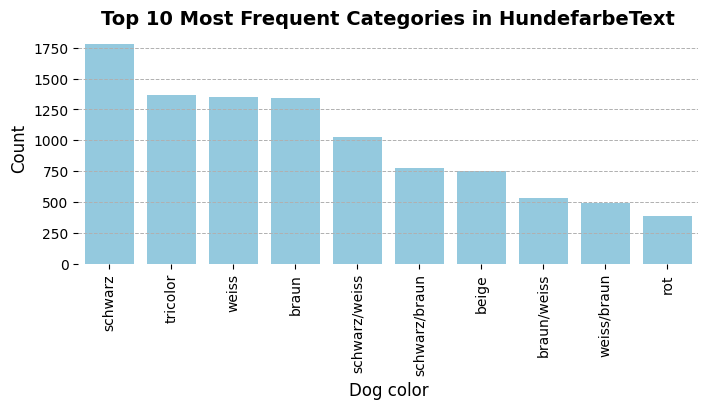

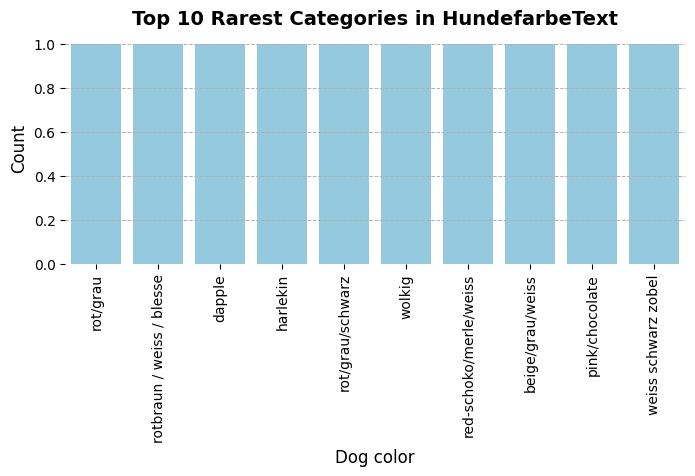

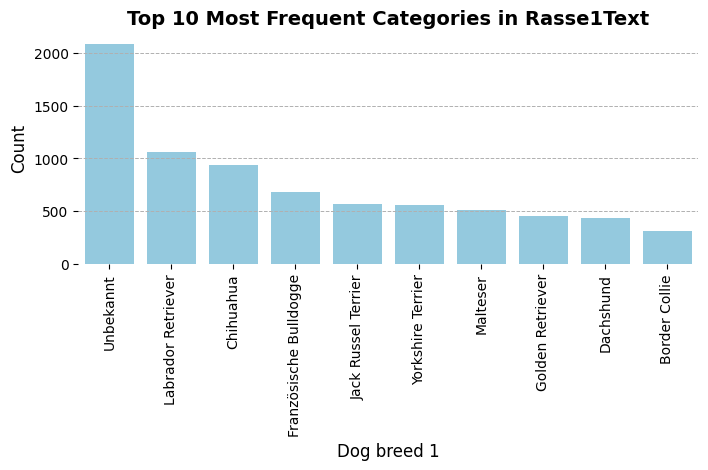

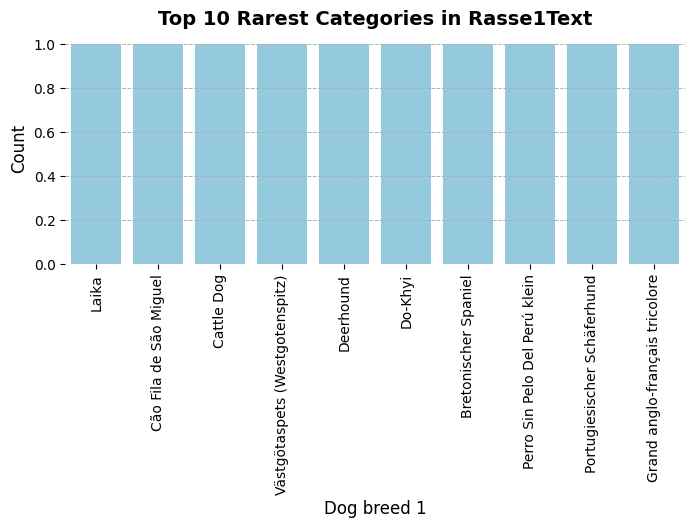

In [10]:
def plot_top_bottom_categories(df, column, top_n=10, rarest=False):
    if rarest:
        categories = df[column].value_counts().nsmallest(top_n)
        title = f'Top {top_n} Rarest Categories in {column}'
    else:
        categories = df[column].value_counts().nlargest(top_n)
        title = f'Top {top_n} Most Frequent Categories in {column}'
    
    df_filtered = df[df[column].isin(categories.index)]
    
    plt.figure(figsize=(8, 3))
    sns.countplot(data=df_filtered, x=column, color="skyblue", order=categories.index)
    plt.title(title, fontsize=14, weight='bold')
    plt.xlabel(variable_descriptions[column], fontsize=12)
    plt.ylabel('Count', fontsize=12)
    plt.xticks(rotation=90, fontsize=10)
    plt.yticks(fontsize=10)
    plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
    sns.despine(left=True, bottom=True)
    plt.show()

# Dog Colors
plot_top_bottom_categories(df_dogs_filtered, column='HundefarbeText', top_n=10, rarest=False)
plot_top_bottom_categories(df_dogs_filtered, column='HundefarbeText', top_n=10, rarest=True)

# God breeds
plot_top_bottom_categories(df_dogs_filtered, column='Rasse1Text', top_n=10, rarest=False)
plot_top_bottom_categories(df_dogs_filtered, column='Rasse1Text', top_n=10, rarest=True) 

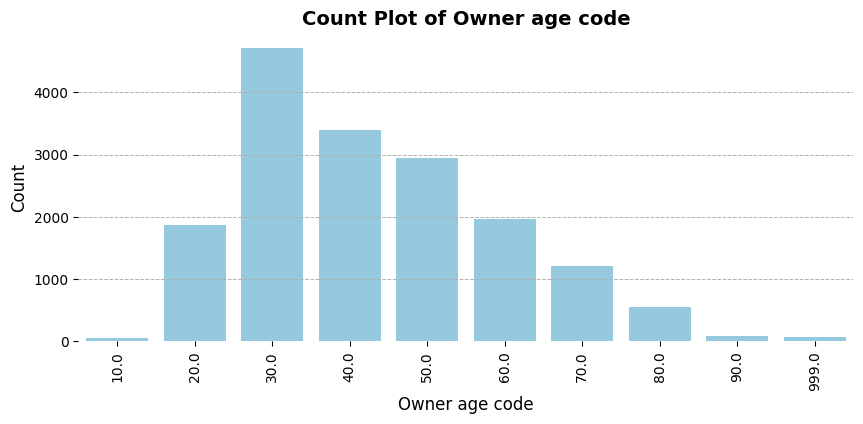

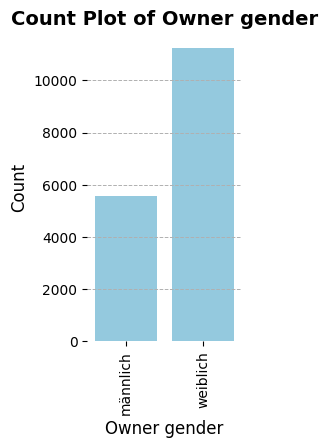

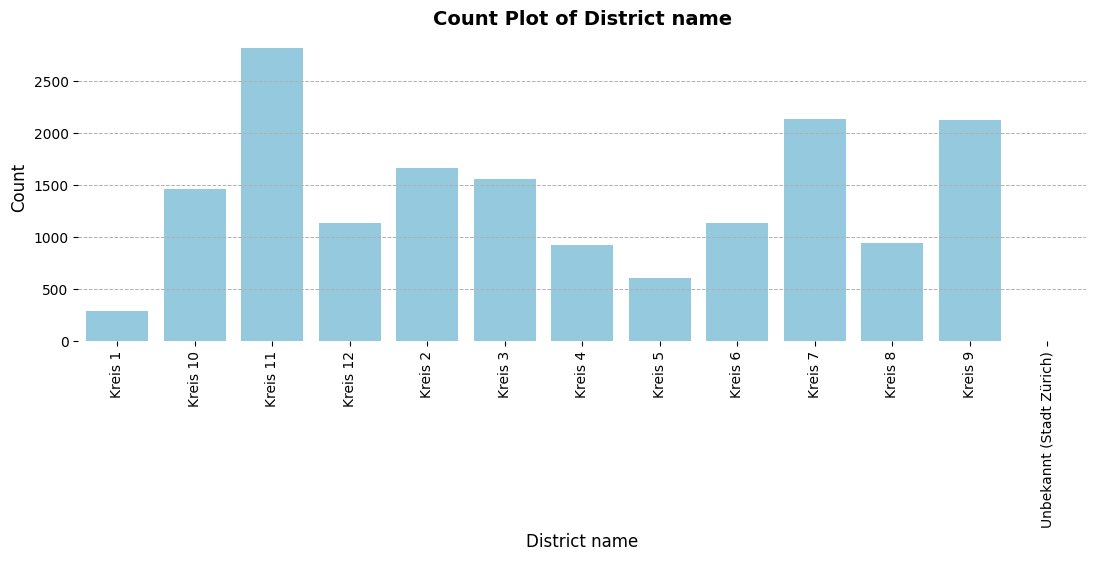

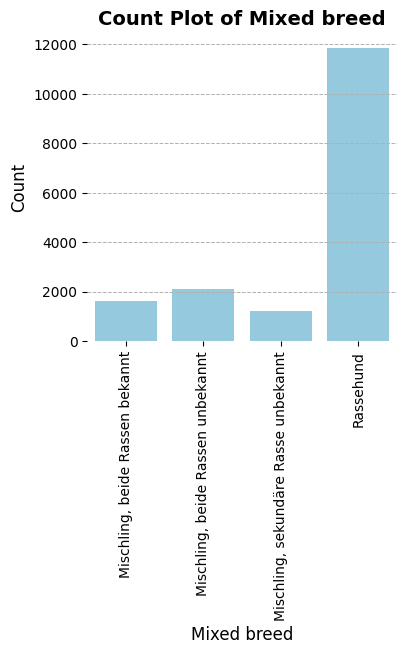

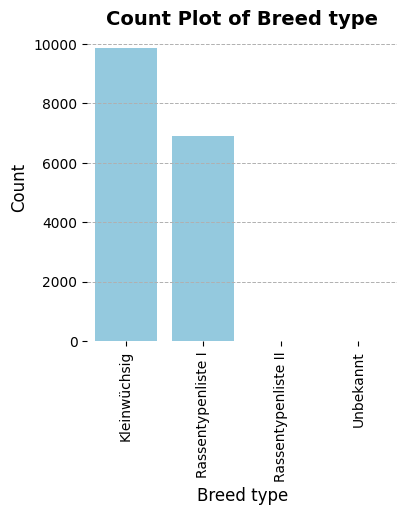

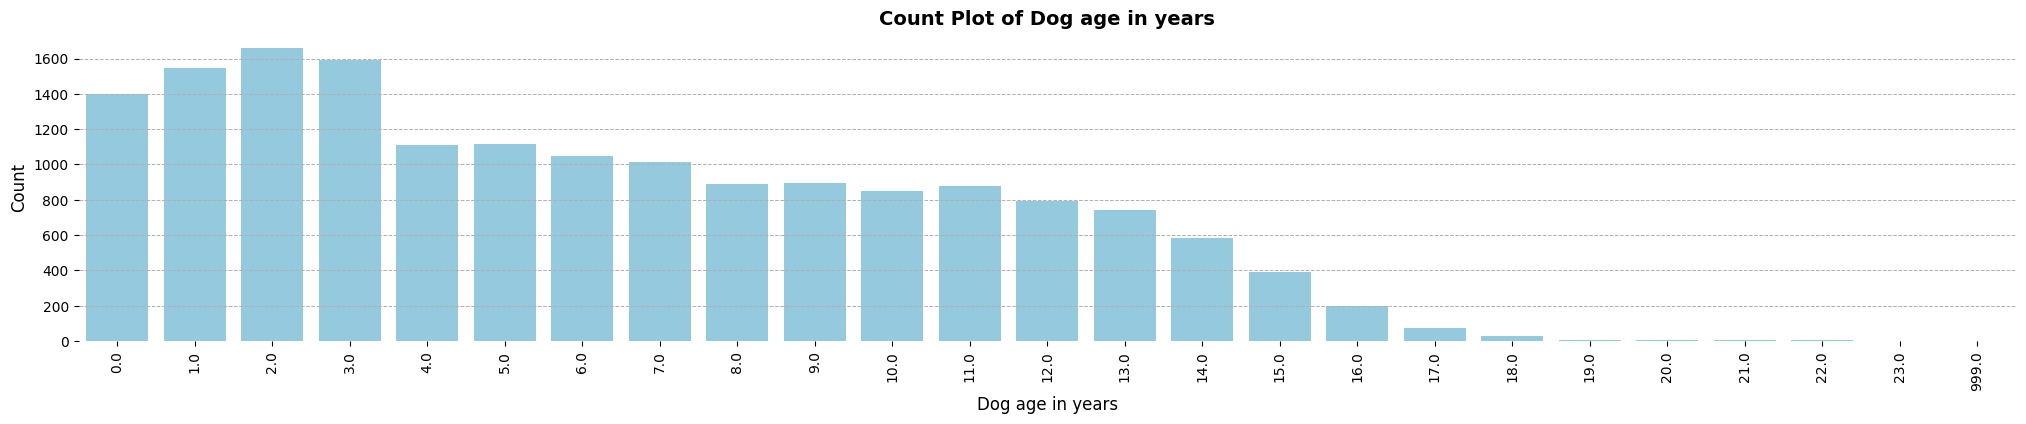

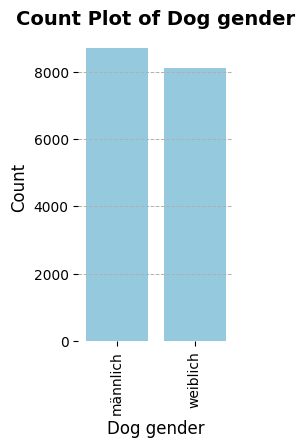

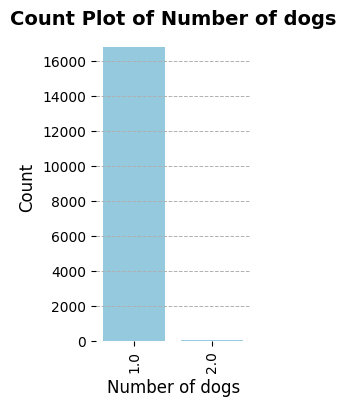

In [11]:
# Count Plots
exclude_columns = ['Rasse1Text', 'HundefarbeText', 'AlterV10Lang']

for col in filtered_columns:
    if col not in exclude_columns:
        num_categories = df_dogs_filtered[col].nunique()
        plt.figure(figsize=(num_categories, 4))
        sns.countplot(data=df_dogs_filtered, x=col, color="skyblue")
        plt.title(f'Count Plot of {variable_descriptions[col]}', fontsize=14, weight='bold')
        plt.xlabel(variable_descriptions[col], fontsize=12)
        plt.ylabel('Count', fontsize=12)
        plt.xticks(rotation=90, fontsize=10)
        plt.yticks(fontsize=10)
        plt.grid(True, axis='y', linestyle='--', linewidth=0.7)
        sns.despine(left=True, bottom=True)
        plt.show()


Dogs by district

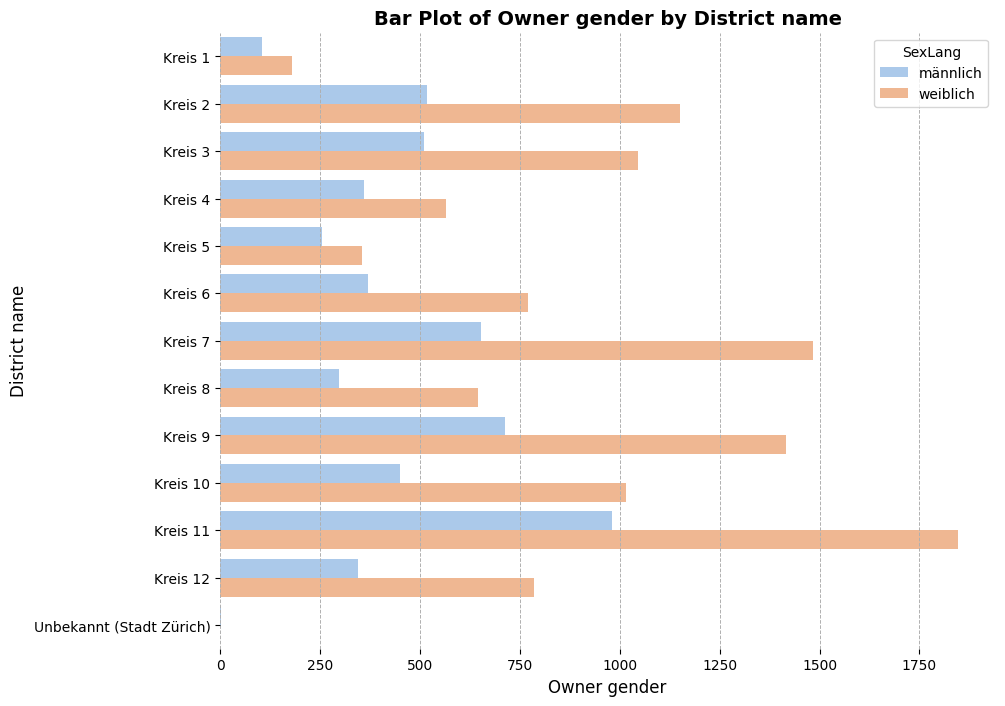

In [12]:
# Stacked Bar Plot
def extract_number(kreis):
    match = re.search(r'\d+', kreis)
    return int(match.group()) if match else float('inf')

ordered_kreis = sorted(df_dogs_filtered['KreisLang'].unique(), key=extract_number)
pastel_colors = sns.color_palette("pastel")

plt.figure(figsize=(10, 8))
sns.countplot(data=df_dogs_filtered, y='KreisLang', hue='SexLang', order=ordered_kreis, palette=pastel_colors)
plt.title(f'Bar Plot of {variable_descriptions["SexLang"]} by {variable_descriptions["KreisLang"]}', fontsize=14, weight='bold')
plt.xlabel(variable_descriptions["SexLang"], fontsize=12)
plt.ylabel(variable_descriptions["KreisLang"], fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True, axis='x', linestyle='--', linewidth=0.7)
sns.despine(left=True, bottom=True)
plt.show()

#### EDA Discussion

**The explanatory data analysis reveals a number of interesting insights about dogs in Zurich:**
- Black tricolor, white, and brown are the most frequent colors. However, the number of different colors is quite diverse.
- Oftentimes, the exact breed is unknown, but Labrador Retrievers and Chihuahuas are the most common purebred dogs.
- The most frequent group of dog owners are in their thirties, and dog owners are more often women than men.
- A large share of dogs are between 0 and 3 years old. The maximum age in the sample is 18 years.
- A substantial share of dogs are small dogs ("Kleinwüchsig").
- The sex balance of the dogs is nearly equal.
- Owning more than one dog is very rare in the city of Zurich.

**Insights for further modeling:**
- The number of categories for dog breeds needs to be reduced, as the data contains many categories with few observations. A separate category for rare breeds will be created.
- The same applies to the color, where it also makes sense to create a separate category for rare colors.
- The race type ("Rassentyp") is reduced to two categories, as type II dogs are very rare. Unknown types are removed from the data.
- The subcategories of mixed-breed dogs are pooled to avoid having classes with few observations (and because analyzing the exact type of mixed-breed dogs is not a priority).



### Feature Engineering

#### Reduce Number of Categories in Rasse1Text

The dataset contains a large number of dog breeds, which is the intended dependent variable. To make sure that each class has enough observations, rare breeds (fewer than 200 observations) care put into the class 'Seltene Rasse'.

In [13]:
# Replace rare breeds with "Seltene Rasse"
category_counts = df_dogs_filtered['Rasse1Text'].value_counts()
rare_categories = category_counts[category_counts < 100].index
df_dogs_filtered['Rasse1Text'] = df_dogs_filtered['Rasse1Text'].apply(lambda x: 'Seltene Rasse' if x in rare_categories else x)
df_dogs_filtered['Rasse1Text'] = df_dogs_filtered['Rasse1Text'].astype('category')

In [14]:
df_dogs_filtered['Rasse1Text'].value_counts()

Rasse1Text
Seltene Rasse                    5047
Unbekannt                        2089
Labrador Retriever               1058
Chihuahua                         933
Französische Bulldogge            683
Jack Russel Terrier               563
Yorkshire Terrier                 557
Malteser                          510
Golden Retriever                  452
Dachshund                         431
Border Collie                     310
Mops                              306
Zwergspitz                        305
Zwergpudel                        293
Beagle                            253
Bolonka Zwetna                    220
Lagotto Romagnolo                 200
Pudel                             179
Australian Shepherd               173
Deutscher Kleinspitz              168
Shih Tzu                          161
West Highland White Terrier       147
English Cocker Spaniel            137
Berner Sennenhund                 131
Parson Russell Terrier            124
Appenzeller Sennenhund            122
C

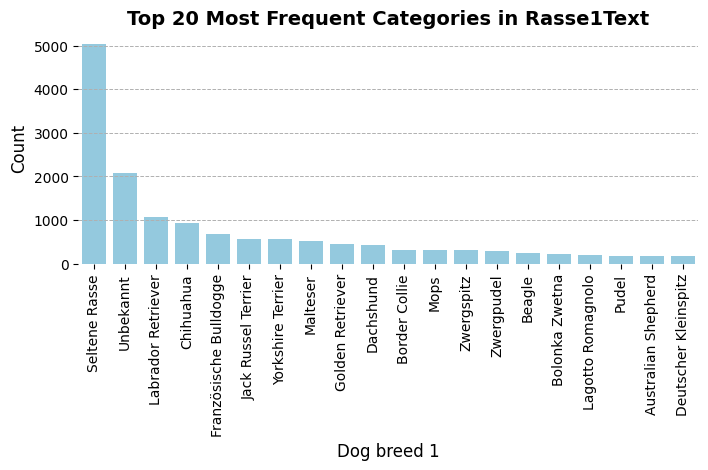

In [15]:
plot_top_bottom_categories(df_dogs_filtered, column='Rasse1Text', top_n=20, rarest=False)

#### Reduce Number of Categories in HundefarbeText

In [16]:
# Replace rare breeds with "Seltene Rasse"
category_counts = df_dogs_filtered['HundefarbeText'].value_counts()
rare_categories = category_counts[category_counts < 100].index
df_dogs_filtered['HundefarbeText'] = df_dogs_filtered['HundefarbeText'].apply(lambda x: 'Seltene Farbe' if x in rare_categories else x)
df_dogs_filtered['HundefarbeText'] = df_dogs_filtered['HundefarbeText'].astype('category')

In [17]:
df_dogs_filtered['HundefarbeText'].value_counts()

HundefarbeText
Seltene Farbe          3548
schwarz                1782
tricolor               1366
weiss                  1354
braun                  1343
schwarz/weiss          1029
schwarz/braun           772
beige                   751
braun/weiss             532
weiss/braun             489
rot                     385
weiss/schwarz           316
black/tan               311
braun/schwarz           284
hellbraun               280
golden                  265
creme                   238
grau                    236
apricot                 223
blondfarben             195
schwarz/braun/weiss     166
gelb                    164
gestromt                155
rot/weiss               155
orange                  139
weiss/beige             138
beige/weiss             103
blue/tan                102
Name: count, dtype: int64

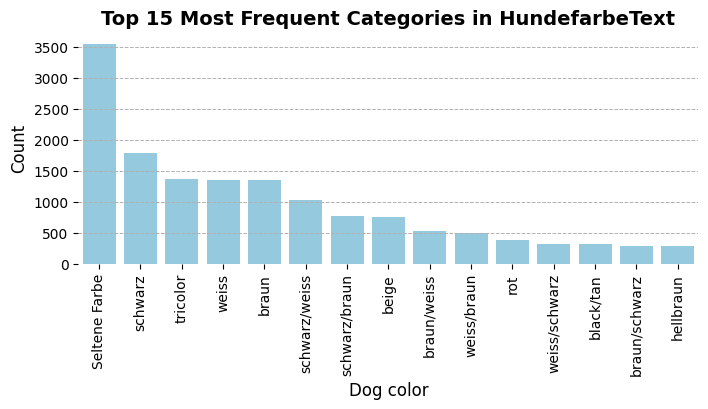

In [18]:
plot_top_bottom_categories(df_dogs_filtered, column='HundefarbeText', top_n=15, rarest=False)

#### Pool the categories in RassentypLang

Kleinwüchsig means small breed; Type 1 refers to large dogs, and Type 2 refers to high-risk dogs. Unbekannt means unknown. For this analysis, Types 1 and 2 are combined, and unknown types are excluded."

In [19]:
categories_to_pool = [
    'Rassentypenliste I',
    'Rassentypenliste II'
]

df_dogs_filtered['RassentypLang'] = df_dogs_filtered['RassentypLang'].replace(categories_to_pool, 'Typ I/II')
df_dogs_filtered = df_dogs_filtered[df_dogs_filtered['RassentypLang'] != 'Unbekannt']
df_dogs_filtered['RassentypLang'] = df_dogs_filtered['RassentypLang'].cat.remove_categories(['Unbekannt'])
    
print(df_dogs_filtered['RassentypLang'].value_counts())

RassentypLang
Kleinwüchsig    9872
Typ I/II        6935
Name: count, dtype: int64


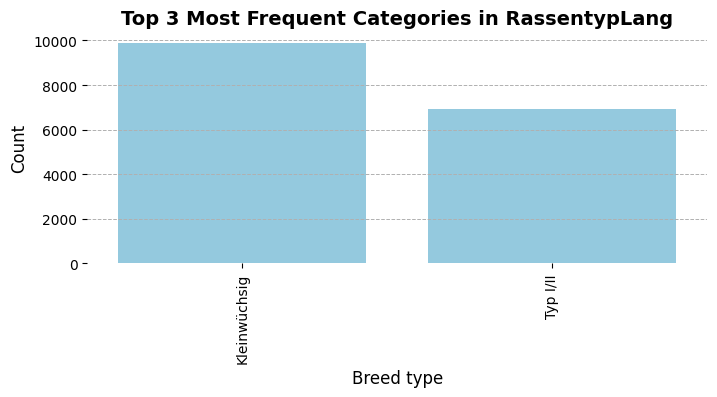

In [20]:
plot_top_bottom_categories(df_dogs_filtered, column='RassentypLang', top_n=3, rarest=False)

#### Pool the categories in RasseMischlingLang

In [21]:
categories_to_pool = [
    'Mischling, beide Rassen bekannt',
    'Mischling, beide Rassen unbekannt',
    'Mischling, sekundäre Rasse unbekannt'
]

df_dogs_filtered['RasseMischlingLang'] = df_dogs_filtered['RasseMischlingLang'].replace(categories_to_pool, 'Mischling')

print(df_dogs_filtered['RasseMischlingLang'].value_counts())

RasseMischlingLang
Rassehund    11868
Mischling     4939
Name: count, dtype: int64


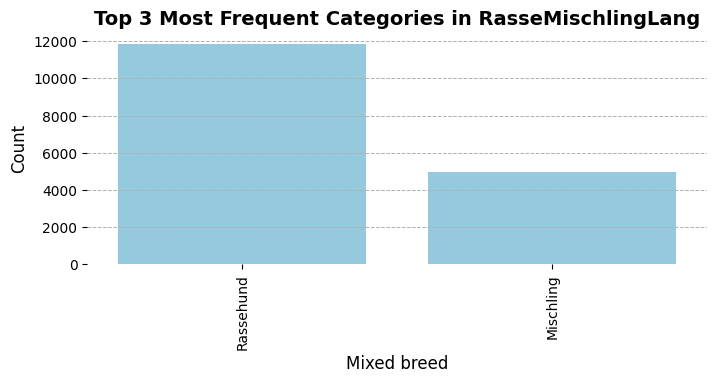

In [22]:
plot_top_bottom_categories(df_dogs_filtered, column='RasseMischlingLang', top_n=3, rarest=False)

#### Remove Rasse1Text from Model

Rasse1Text is removed from the model because the breed name is a near-perfect predictor of whether a dog is purebred. However, the goal of this project is to predict that based on other factors.

In [23]:
df_dogs_filtered = df_dogs_filtered.drop(columns=['Rasse1Text'])

Checking for collinearity and multicollinearity

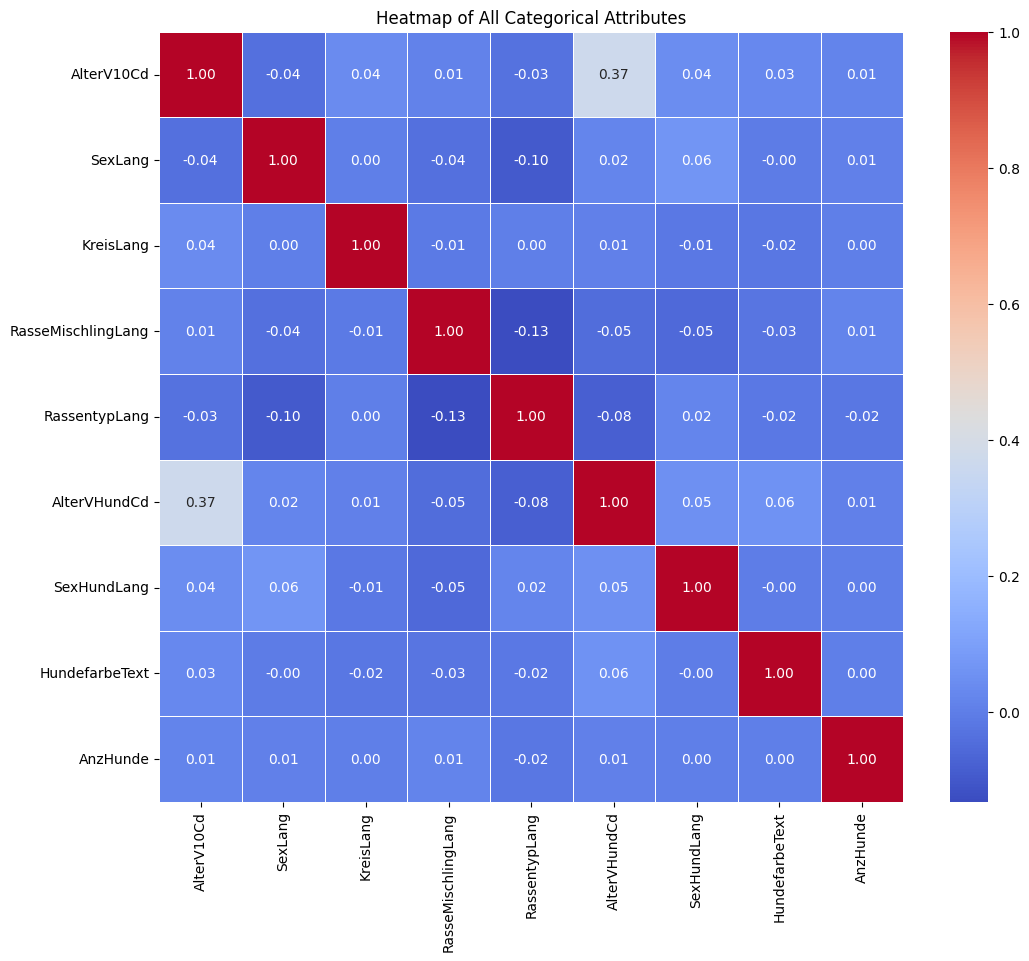

In [24]:
# Heatmap
df_encoded = df_dogs_filtered.apply(lambda x: x.astype('category').cat.codes)
corr_matrix = df_encoded.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Heatmap of All Categorical Attributes')
plt.show()

In [25]:
print(df_dogs_filtered.info())

<class 'pandas.core.frame.DataFrame'>
Index: 16807 entries, 28346 to 80787
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   AlterV10Cd          16807 non-null  float64 
 1   SexLang             16807 non-null  category
 2   KreisLang           16807 non-null  category
 3   RasseMischlingLang  16807 non-null  category
 4   RassentypLang       16807 non-null  category
 5   AlterVHundCd        16807 non-null  float64 
 6   SexHundLang         16807 non-null  category
 7   HundefarbeText      16807 non-null  category
 8   AnzHunde            16807 non-null  float64 
dtypes: category(6), float64(3)
memory usage: 626.1 KB
None


In [26]:
X = df_dogs_filtered[numerical_columns]

# Calculate VIF for each feature
X = sm.add_constant(X)
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

        Feature         VIF
0         const  564.521112
1  AlterVHundCd    1.001458
2      AnzHunde    1.000502
3    AlterV10Cd    1.001954


The following features show weak correlations (0.1 ≤ |r| < 0.4):

- `AlterV10Cd` and `AlterVHundCd`
- `RasseMischlingLang` and `RassentypLang`
- `RasseMischlingLang` and `SexLang`

The VIF of the numerical attributes indicates no multicollinearity.


 ## Analysis

Two models are estimated and compared: Logistic Regression and Random Forest Classifier. The models are trained on the data and evaluated using Precision, Recall, and the F1 score.

### Model 1: Logistic Regression

#### Preparation: Test-Train Split

In [27]:
X = df_dogs_filtered.drop(columns=['RasseMischlingLang'])
y = df_dogs_filtered['RasseMischlingLang']

X = pd.get_dummies(X, drop_first=True)
X = X.apply(pd.to_numeric, errors='coerce')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"y_test shape: {y_test.shape}")

X_train shape: (13445, 45)
X_test shape: (3362, 45)
y_train shape: (13445,)
y_test shape: (3362,)


#### Fitting the Model with GridSearch

GridSearch is used to iteratively improve the model.

In [28]:
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'max_iter': [100, 200, 500, 1000]
}

model = LogisticRegression()

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.01, 0.1, 1, 10],
                         'max_iter': [100, 200, 500, 1000]},
             scoring='f1_macro')

#### Predict and Evaluate

In [29]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
y_train_pred = best_model.predict(X_train)

print("Best Hyperparameters:", grid_search.best_params_)

print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_pred))

Best Hyperparameters: {'C': 10, 'max_iter': 100}
Training Set Performance:
              precision    recall  f1-score   support

   Mischling       0.57      0.13      0.21      3946
   Rassehund       0.73      0.96      0.83      9499

    accuracy                           0.72     13445
   macro avg       0.65      0.54      0.52     13445
weighted avg       0.68      0.72      0.65     13445

Test Set Performance:
              precision    recall  f1-score   support

   Mischling       0.54      0.12      0.20       993
   Rassehund       0.72      0.96      0.82      2369

    accuracy                           0.71      3362
   macro avg       0.63      0.54      0.51      3362
weighted avg       0.67      0.71      0.64      3362



                               Feature  Coefficient  Importance
16              RassentypLang_Typ I/II    -0.298538    0.298538
39        HundefarbeText_schwarz/weiss    -0.217012    0.217012
32            HundefarbeText_hellbraun    -0.187880    0.187880
37        HundefarbeText_schwarz/braun    -0.166547    0.166547
25        HundefarbeText_braun/schwarz    -0.165204    0.165204
21            HundefarbeText_black/tan     0.163421    0.163421
23             HundefarbeText_blue/tan     0.158452    0.158452
34                  HundefarbeText_rot     0.146672    0.146672
19                HundefarbeText_beige    -0.144329    0.144329
24                HundefarbeText_braun    -0.143440    0.143440
42          HundefarbeText_weiss/beige    -0.117411    0.117411
17                SexHundLang_weiblich    -0.107960    0.107960
36              HundefarbeText_schwarz    -0.107854    0.107854
26          HundefarbeText_braun/weiss    -0.105026    0.105026
28                 HundefarbeText_gelb  

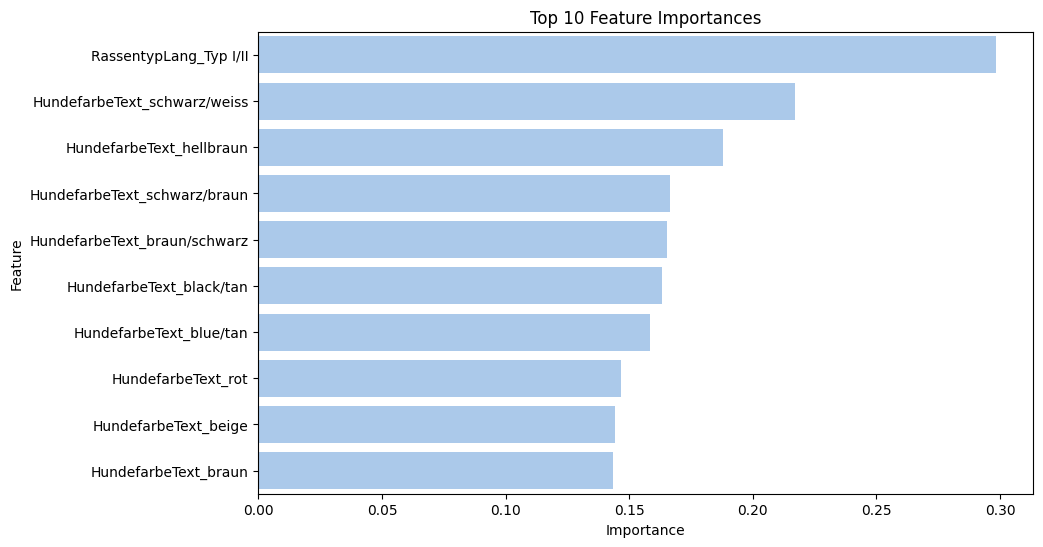

In [30]:
coefficients = best_model.coef_[0]
feature_names = X.columns

feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

feature_importance['Importance'] = feature_importance['Coefficient'].abs()
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print(feature_importance)

# Prepare for plotting and plot
top_features = feature_importance.head(10)
sns.set_palette("pastel")
plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

#### Results
The model is evaluated using Precision, Recall, and the F1 Score. The overall performance is moderate, with good results for the category `Rassenhund` (pure breed) but rather poor performance for `Mischling` (mixed breed). For purebred dogs (`Rassenhund`), precision is 0.72, recall is 0.96, and the F1 score is 0.82. For `Mischling` (mixed breed), the model performs poorly, with precision at 0.54, recall at 0.12, and an F1 score of 0.20. This could be partially due to class imbalance, which could be addressed in a future iteration of this analysis.

The most important feature is whether the dog is a large or high-risk breed, followed by dog colors and color combinations.


### Model 2: Random Forest

#### Fitting the Model with GridSearch

In [31]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
}

rf_model = RandomForestClassifier(random_state=42)

grid_search_rf = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='f1_macro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'n_estimators': [100, 200, 300]},
             scoring='f1_macro')

#### Predict and Evaluate

In [32]:
best_rf_model = grid_search_rf.best_estimator_

y_test_pred = best_rf_model.predict(X_test)
y_train_pred = best_rf_model.predict(X_train)

print("Training Set Performance:")
print(classification_report(y_train, y_train_pred))

print("Test Set Performance:")
print(classification_report(y_test, y_test_pred))

Training Set Performance:
              precision    recall  f1-score   support

   Mischling       0.97      0.90      0.93      3946
   Rassehund       0.96      0.99      0.97      9499

    accuracy                           0.96     13445
   macro avg       0.96      0.95      0.95     13445
weighted avg       0.96      0.96      0.96     13445

Test Set Performance:
              precision    recall  f1-score   support

   Mischling       0.40      0.27      0.32       993
   Rassehund       0.73      0.83      0.78      2369

    accuracy                           0.66      3362
   macro avg       0.57      0.55      0.55      3362
weighted avg       0.63      0.66      0.64      3362



AlterVHundCd: 0.3298
AlterV10Cd: 0.1999
SexHundLang_weiblich: 0.0367
SexLang_weiblich: 0.0355
RassentypLang_Typ I/II: 0.0269
KreisLang_Kreis 11: 0.0212
KreisLang_Kreis 7: 0.0186
KreisLang_Kreis 9: 0.0178
HundefarbeText_schwarz: 0.0174
KreisLang_Kreis 2: 0.0162
KreisLang_Kreis 3: 0.0162
KreisLang_Kreis 10: 0.0160
KreisLang_Kreis 6: 0.0149
KreisLang_Kreis 12: 0.0148
KreisLang_Kreis 4: 0.0135
HundefarbeText_braun: 0.0131
HundefarbeText_tricolor: 0.0131
KreisLang_Kreis 8: 0.0127
HundefarbeText_schwarz/weiss: 0.0109
KreisLang_Kreis 5: 0.0104
HundefarbeText_beige: 0.0102
HundefarbeText_braun/weiss: 0.0100
HundefarbeText_schwarz/braun: 0.0100
HundefarbeText_weiss/braun: 0.0096
HundefarbeText_weiss: 0.0095
HundefarbeText_hellbraun: 0.0085
HundefarbeText_braun/schwarz: 0.0077
HundefarbeText_weiss/schwarz: 0.0076
HundefarbeText_creme: 0.0067
HundefarbeText_apricot: 0.0057
HundefarbeText_schwarz/braun/weiss: 0.0056
HundefarbeText_rot: 0.0055
HundefarbeText_blondfarben: 0.0054
HundefarbeText_golde

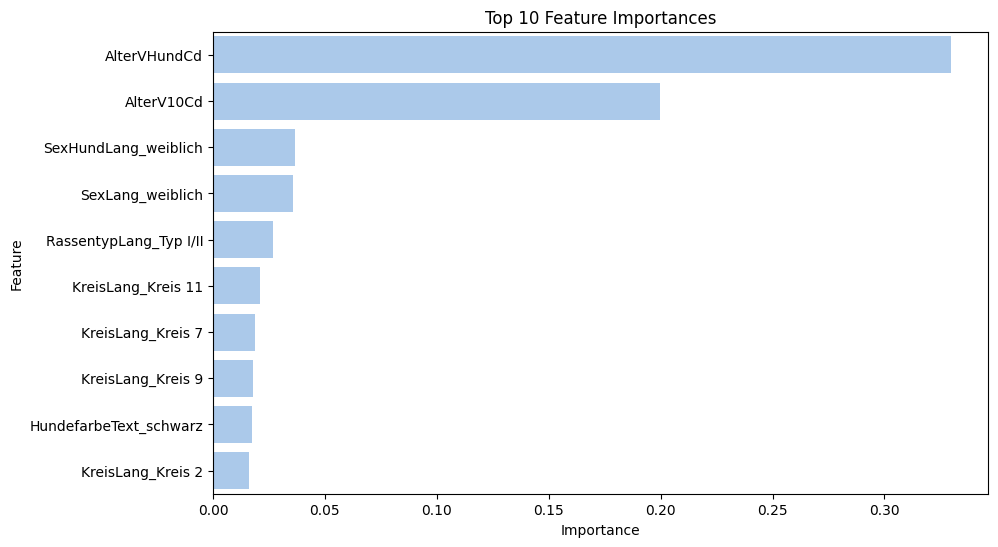

In [33]:
importances = best_rf_model.feature_importances_

feature_names = X.columns
feature_importance_dict = dict(zip(feature_names, importances))

sorted_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

for feature, importance in sorted_importance:
    print(f"{feature}: {importance:.4f}")

# Prepare for plotting
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': best_rf_model.feature_importances_
})

top_features = feature_importances.nlargest(10, 'Importance')

# Plot
sns.set_palette("pastel")

plt.figure(figsize=(10, 6))
sns.barplot(data=top_features, x='Importance', y='Feature')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importances")
plt.show()

#### Results
The model is evaluated using Precision, Recall, and the F1 Score. The overall performance is moderate, with good results for the category `Rassenhund` (pure breed) but rather poor performance for `Mischling` (mixed breed). For purebred dogs (`Rassenhund`), precision is 0.73, recall is 0.83, and the F1 score is 0.78. For `Mischling` (mixed breed), the model performs worse, with precision at 0.40, recall at 0.27, and an F1 score of 0.32.

The most important feature is the age of the dog, followed by the age of the owner.

### Model Comparison
Both models performed moderately for the pure-breed category but performed worse for the mixed-breed category. Considering both classes, the random forest model outperformed logistic regression in this case. The two models identified different features as the most important: in logistic regression, dog type was the most important feature, while in random forest, it was the age of the dog.

# Discussion and Conclusion

The original goal of predicting the exact breed of a dog based on the features in the dataset turned out to be infeasible, so I pivoted to predicting whether a dog is purebred or mixed breed. The two models showed moderate performance for predicting purebred dogs and weak performance for the mixed-breed class. This may be due to the limited information in the features, which cannot be addressed in this analysis as no additional data is available. Another factor could be class imbalances, which could potentially be corrected in a future iteration.

The analysis of feature importance revealed different patterns for the logistic regression and random forest classifiers. For logistic regression, the most important feature was dog type (small or Type I/II), while for random forest, it was the age of the dog and the owner's characteristics. These could potentially be explained by the fact that small dogs may more often be purebred. The age effect could reflect recent trends of acquiring purebred dogs or the possibility that mixed breeds are generally heal
